#Statistics 786 PyMC3 Chapter 2 Practice

##Flipping coins the PyMC3 way

In [1]:
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:
np.random.seed(305)
trials = 4
θ_real = 0.35
data = stats.bernoulli.rvs(p=θ_real, size=trials)

In [4]:
with pm.Model() as our_first_model:
  θ = pm.Beta('θ', alpha=1., beta=1.)
  y = pm.Bernoulli('y', p=θ, observed=data)
  trace = pm.sample(1000, random_seed=305)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f134ae25e10>,
      dtype=object)

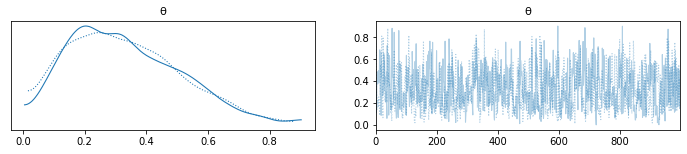

In [5]:
az.plot_trace(trace)

In [ ]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.333,0.178,0.043,0.659,0.007,0.005,672.0,974.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


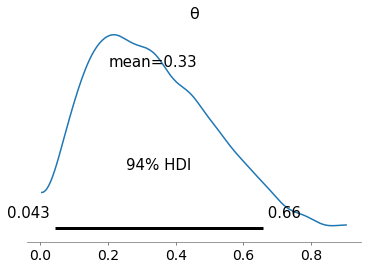

In [ ]:
az.plot_posterior(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


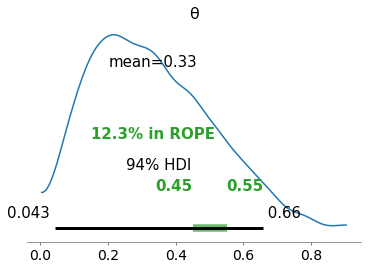

In [ ]:
az.plot_posterior(trace, rope=[0.45, .55])

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


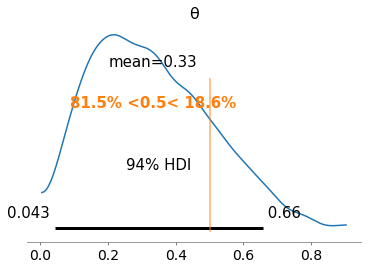

In [ ]:
az.plot_posterior(trace, ref_val=0.5)

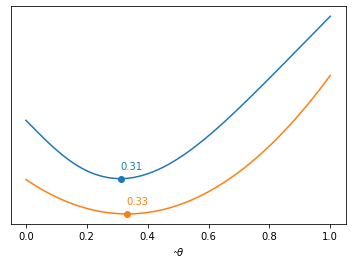

In [ ]:
grid = np.linspace(0, 1, 200)
θ_pos = trace['θ']
lossf_a = [np.mean(abs(i - θ_pos)) for i in grid]
lossf_b = [np.mean((i - θ_pos)**2) for i in grid]

for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
  mini = np.argmin(lossf)
  plt.plot(grid, lossf, c)
  plt.plot(grid[mini], lossf[mini], 'o', color=c)
  plt.annotate('{:.2f}'.format(grid[mini]), (grid[mini], lossf[mini] + 0.03), color=c)
  plt.yticks([])
  plt.xlabel(r'$\hat \theta$')

##Excercise 1
Using PyMC3, change the parameters of the prior beta distribution
in our_first_model to match those of the previous chapter. Compare the
results to the previous chapter. Replace the beta distribution with a uniform one in the interval [0,1]. Are the results equivalent to the ? Is the
sampling slower, faster, or the same? What about using a larger interval such as
[-1, 2]? Does the model run? What errors do you get?

In [ ]:
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(305)
trials = 4
θ_real = 0.35
data = stats.bernoulli.rvs(p=θ_real, size=trials)

data

array([0, 1, 0, 0])

In [ ]:
with pm.Model() as our_first_model:
  θ = pm.Uniform('θ', lower=0, upper=1)
  y = pm.Bernoulli('y', p=θ, observed=data)
  trace = pm.sample(1000, random_seed=305)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf4c6e6790>,
      dtype=object)

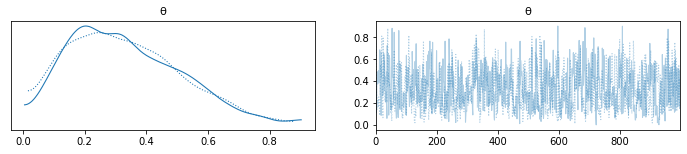

In [ ]:
az.plot_trace(trace)

In [ ]:
with pm.Model() as our_second_model:
  θ = pm.Uniform('θ', lower=-1, upper=2)
  y = pm.Bernoulli('y', p=θ, observed=data)
  trace2 = pm.sample(1000, random_seed=305)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
There were 159 divergences after tuning. Increase `target_accept` or reparameterize.
There were 295 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf53991210>,
      dtype=object)

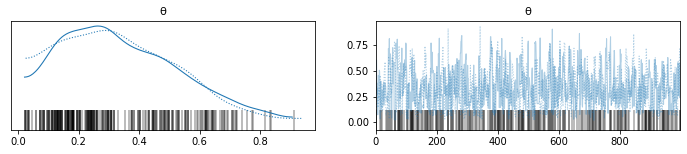

In [ ]:
az.plot_trace(trace2)

##Excercise 4
Using the data in the chemical_shifts.csv file, compute the empirical mean
and the standard deviation with and without outliers. Compare those results to
the Bayesian estimation using the Gaussian and Student's t-distribution. Repeat
the exercise by adding more outliers.

In [ ]:
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file = 'gdrive/My Drive/Colab Notebooks/Modeling and Visualization/Data/chemical_shifts.csv'

file = np.loadtxt(file)

In [ ]:
file

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16])

In [ ]:
with pm.Model() as ex4:
  μ = pm.Uniform('μ', lower=40, upper=70)
  σ = pm.HalfNormal('σ', sd=10)
  y = pm.Normal('y', mu=μ, sd=σ, observed=file)
  trace = pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf4ac5e610>,
      dtype=object)

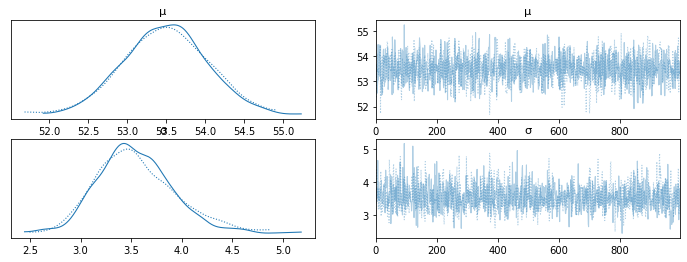

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,53.485,0.531,52.446,54.427,0.014,0.010,1496.0,1215.0,1.00
σ,3.545,0.382,2.874,4.296,0.010,0.007,1482.0,1324.0,1.01


In [ ]:
np.average(file)

53.49645833333333

In [ ]:
np.std(file)

3.4200063898474258

We get very similar results. The pymc3 model gives us an average of 53.485 and a standard deviation of 3.545. The true average is 53.496 and the true standard deviation is 3.420

Now we will try without outliers

In [ ]:
with pm.Model() as ex4b:
  μ = pm.Uniform('μ', 40, 70)
  σ = pm.HalfNormal('σ', sd=10)
  ν = pm.Exponential('ν', 1/30)
  y = pm.StudentT('y', mu=μ, sd=σ, nu=ν, observed=file)
  trace = pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ν, σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf45052250>,
      dtype=object)

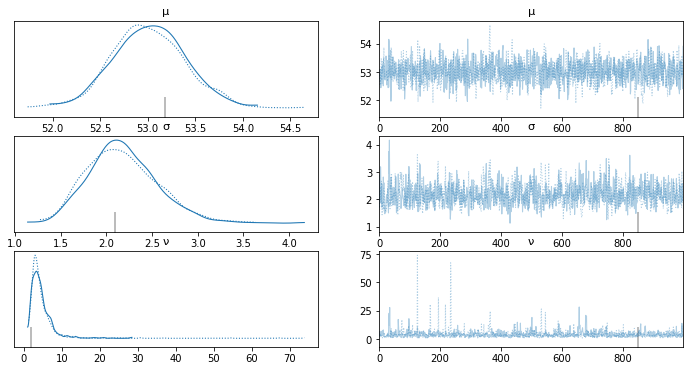

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,53.017,0.379,52.350,53.762,0.010,0.007,1466.0,1203.0,1.0
σ,2.178,0.379,1.463,2.836,0.012,0.009,976.0,845.0,1.0
ν,4.561,3.817,1.274,8.620,0.117,0.083,1067.0,1025.0,1.0


The results seems worse this time. The model performed better when we used a gaussian distribution rather than a students t distribution.

##Exercise 7
Repeat the exercise we did with model_h. This time, without hierarchical
structure, use a flat prior such as . Compare the results of both
models.